In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('./datasets/titanic.csv')

In [16]:
ages = df['Age'].dropna()

def round_up(element):
   #" Function that rounds a float up to the ceiling and casts to an integer. “”"
   return int(np.ceil(element))

ages = sorted(list(map(round_up, ages)))

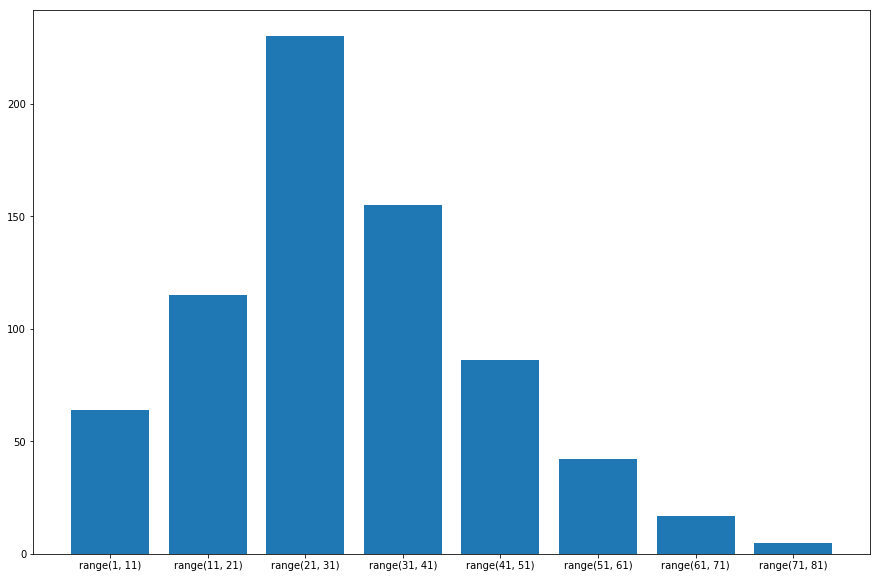

In [17]:
buckets = []

NUM_BUCKETS = 8

step = int(np.max(ages) / NUM_BUCKETS)
floor, ceil = np.min(ages), np.min(ages) + step

for position in range(NUM_BUCKETS):
    current_bucket = range(floor, ceil)
    buckets.append(current_bucket)
    floor += step; ceil += step

bucket_histogram = dict((bucket, 0) for bucket in buckets)

for age in ages:
   for bucket in buckets:
       if age in bucket:
           bucket_histogram[bucket] += 1

plt.figure(figsize=(15, 10))
plt.bar(np.arange(NUM_BUCKETS), bucket_histogram.values())

# keys = [“0-10”, “10-20"]
plt.xticks(np.arange(NUM_BUCKETS), bucket_histogram.keys())
plt.show()